In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [36]:
# Next, we’ll take advantage of the make_classification function from the scikit-learn library to generate data. As we mentioned previously, 
#Logistic Regression is only applicable to binary classification problems. 
#Thus, the data points are composed of two classes.

In [38]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

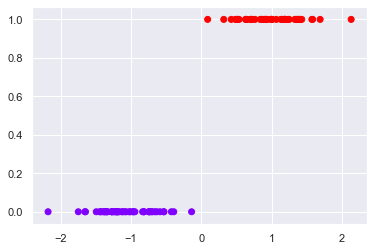

In [39]:
# We plot the relationship between the feature and classes.
plt.scatter(x, y, c=y, cmap='rainbow')

In [40]:
#Prior to training our model, we’ll set aside a portion of our data in order to evaluate its performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [41]:
# We instantiate an instance of the LogisticRegression class and call the fit function with the features and the labels (since Logistic Regression is a
#supervised machine learning algorithm) as arguments.

lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#We can access the following properties to actually view the coefficient for the slope and y-intercept of the best fitting line.
print(lr.coef_)
print(lr.intercept_)

[[3.07988671]]
[0.00059132]


In [43]:
# Let’s see how the model performs against data that it hasn’t been trained on.

In [44]:
y_pred = lr.predict(x_test)

In [45]:
# Given that this consists of a classification problem, 
#we use a confusion matrix to measure the accuracy of our model.

confusion_matrix(y_test, y_pred)


array([[11,  0],
       [ 0, 14]])

In [46]:
# If for whatever reason we’d like to check the actual probability that a data 
#point belongs to a given class, 
#we can use the predict_proba function.

lr.predict_proba(x_test)

array([[0.18314344, 0.81685656],
       [0.12364899, 0.87635101],
       [0.97883039, 0.02116961],
       [0.89925296, 0.10074704],
       [0.92884698, 0.07115302],
       [0.88415832, 0.11584168],
       [0.97442653, 0.02557347],
       [0.10120165, 0.89879835],
       [0.10146515, 0.89853485],
       [0.03628616, 0.96371384],
       [0.78785726, 0.21214274],
       [0.01224259, 0.98775741],
       [0.96958625, 0.03041375],
       [0.02585772, 0.97414228],
       [0.21300879, 0.78699121],
       [0.98525516, 0.01474484],
       [0.02499942, 0.97500058],
       [0.09813931, 0.90186069],
       [0.10594038, 0.89405962],
       [0.98050037, 0.01949963],
       [0.16932041, 0.83067959],
       [0.9759155 , 0.0240845 ],
       [0.9589161 , 0.0410839 ],
       [0.16934897, 0.83065103],
       [0.00551423, 0.99448577]])

In [47]:
# The first column corresponds to the 
#probability that the sample belongs to the first class and the
#second column corresponds to the probability that the 
#sample belongs to the second class.
#Before attempting to plot the Sigmoid function, we create and sort a DataFrame containing our test data.

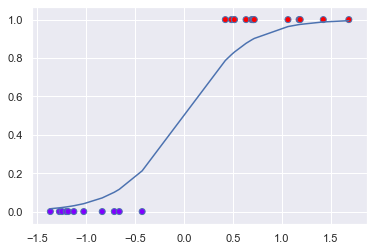

In [48]:
df = pd.DataFrame({'x': x_test[:,0], 'y': y_test})
df = df.sort_values(by='x')
from scipy.special import expit
sigmoid_function = expit(df['x'] * lr.coef_[0][0] + lr.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

<img src="pic.png">